In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
df = pd.read_csv('input.csv')
SEED = 666
np.random.seed(SEED)
df.head()

,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_train_test(test_size = 0.95):
    y = 1*(df['cand_pty_affiliation'] =='REP')
    x = df.drop(['cand_pty_affiliation'], axis = 1)
    x = pd.get_dummies(x,sparse = True)
    x.drop(x.columns[x.std() == 0], axis = 1, inplace = True)
    return train_test_split(x, y, test_size = test_size, random_state=SEED)

x_train, x_test, y_train,y_test = get_train_test()

print('Example data:')
df.head()

Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


Text(0,0.5,'Percentage')

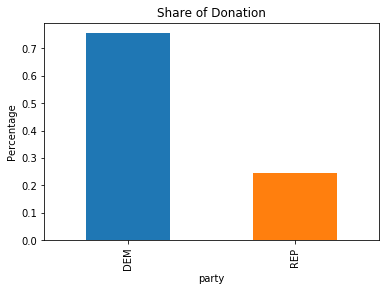

In [10]:
df.cand_pty_affiliation.value_counts(normalize =True ).plot(kind = 'Bar', title ='Share of Donation')
plt.xlabel('party')
plt.ylabel('Percentage')

In [11]:
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [18]:
def print_graph(clf,feature_names):
    graph = export_graphviz(clf,label='root',proportion = True, impurity =False, out_file= None, feature_names = feature_names,class_names={0:'D',1:'R'}, filled = True, rounded =True)
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

Decision Tree ROC-AUC Score:	 0.7628854478695762


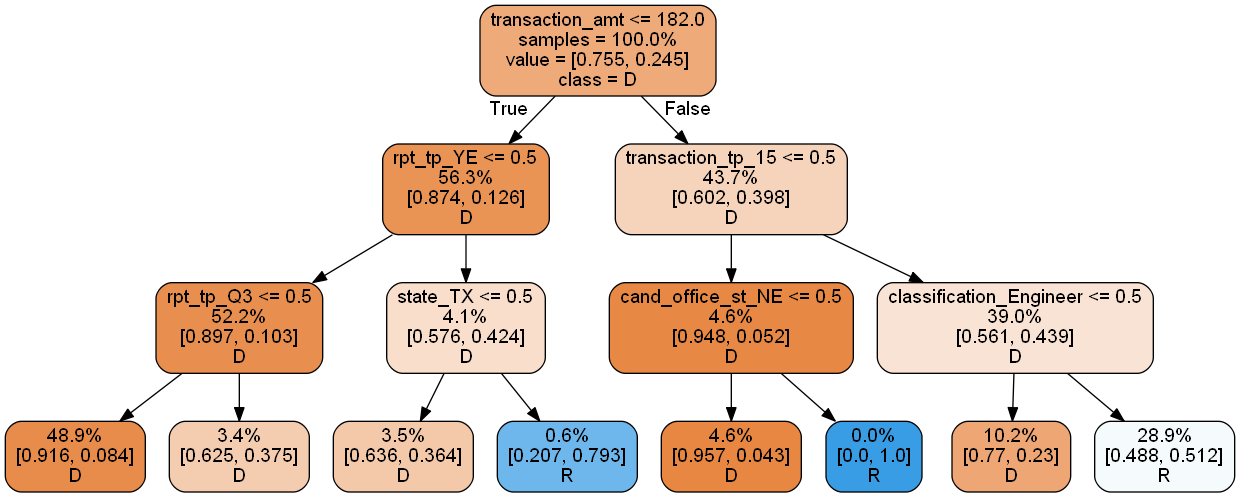

In [19]:
t1 = DecisionTreeClassifier(max_depth = 3, random_state = SEED)
t1.fit(x_train,y_train)
p = t1.predict_proba(x_test)[:,1]

print('Decision Tree ROC-AUC Score:\t', roc_auc_score(y_test, p))
print_graph(t1,x_train.columns)

Decision Tree ROC-AUC Score:	 0.7628854478695762


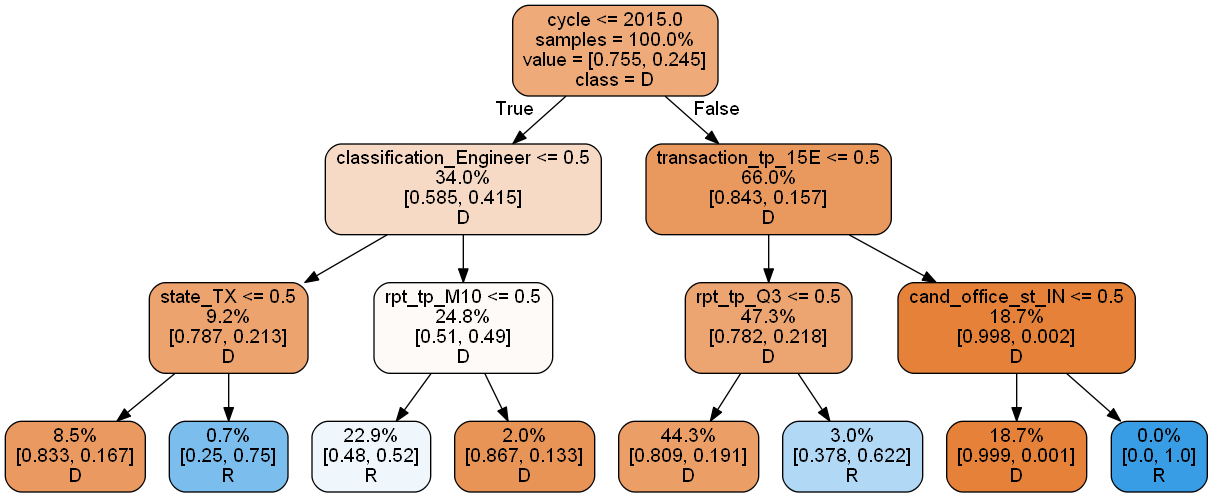

In [26]:
drop= ['transaction_amt']
x_train_slim = x_train.drop(drop,1)
x_test_slim = x_test.drop(drop,1)

t2 = DecisionTreeClassifier(max_depth = 3, random_state = SEED)
t2.fit(x_train_slim, y_train)
p2 = t2.predict_proba(x_test_slim)[:,1]

print('Decision Tree ROC-AUC Score:\t', roc_auc_score(y_test,p))
print_graph(t2, x_train_slim.columns)


In [32]:
p1=t1.predict_proba(x_test)[:,1]
p=np.mean([p1,p2],axis =0)
print('Average:\t',roc_auc_score(y_test,p))

Average:	 0.7894859941118172


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state=SEED)
rf.fit(x_train,y_train)
p =rf.predict_proba(x_test)[:,1]
print('Average:\t', roc_auc_score(y_test,p))

Average:	 0.8778708951204784
